# Libraries

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Data Pre-Processing

Input and read the dataset

In [190]:
nyc_property_sales = pd.read_csv("D:/nyc-rolling-sales.csv")

In [191]:
pd.set_option("display.max_columns",None)
nyc_property_sales

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [192]:
nyc_property_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Cleaning

Make a copy of the original data by defining it as df, so the original data is not corrupt 

In [193]:
df = nyc_property_sales.copy()

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Based on the data above, there is "Unnamed" data that must be deleted. Then the data is tidied up so that if can be called

In [195]:
df = df.drop(["Unnamed: 0"],axis=1)
df.columns = (df.columns.str.lower()).str.replace(" ","_")

Get all the numerical columns and change them to numeric

In [196]:
num_columns = ["residential_units","commercial_units","total_units","land_square_feet","gross_square_feet","year_built","sale_price"]

for col in num_columns:
    df[col] = pd.to_numeric(df[col],errors='coerce')

Get all the categorical columns and change them to categorical

In [197]:
cat_columns = []

for col in df.columns[:-1]:
    if col not in num_columns:
        cat_columns.append(col)
for col in cat_columns:
    df[col] = df[col].astype("category")

Change sale_data column to datetime 

In [198]:
df["sale_date"] = pd.to_datetime(df["sale_date"])

Rename borough based on information on the dataset website, namely:
```
1 : Manhattan 
2 : Bronx 
3 : Brooklyn 
4 : Queens 
5 : Staten Island 
```

In [199]:
def renaming_borough(x):
    if x == 1:
        return "Manhattan"
    elif x == 2:
        return "Bronx"
    elif x == 3:
        return "Brooklyn"
    elif x == 4:
        return "Queens"
    else:
        return "Staten Island"

In [200]:
df["borough"] = df["borough"].apply(renaming_borough)
df.head()

,borough,neighborhood,building_class_category,tax_class_at_present,block,lot,ease-ment,building_class_at_present,address,apartment_number,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


Replace blank space with NaN, then percentage the missing values 

In [201]:
df.replace(' ',np.nan, inplace=True)
df.isna().sum() /len(df) *100

borough                             0.000000
neighborhood                        0.000000
building_class_category             0.000000
tax_class_at_present                0.872877
block                               0.000000
lot                                 0.000000
ease-ment                         100.000000
building_class_at_present           0.872877
address                             0.000000
apartment_number                   77.466055
zip_code                            0.000000
residential_units                   0.000000
commercial_units                    0.000000
total_units                         0.000000
land_square_feet                   31.049818
gross_square_feet                  32.658372
year_built                          0.000000
tax_class_at_time_of_sale           0.000000
building_class_at_time_of_sale      0.000000
sale_price                         17.222170
sale_date                           0.000000
dtype: float64

Count the missing values 

In [202]:
df.isna().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                738
block                                 0
lot                                   0
ease-ment                         84548
building_class_at_present           738
address                               0
apartment_number                  65496
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
dtype: int64

Delete columns that have the largest NaN values and delete columns that are irrelevant

In [203]:
df = df.drop(["ease-ment","apartment_number","block","lot","address"],axis=1)

Drop NaN values from tax_class_at_present and building_class_at_present columns

In [204]:
df = df.dropna(subset=["tax_class_at_present","building_class_at_present"])

Change NaN values in land_square_feet, gross_square_feet and sale_price columns to 0

In [205]:
for i in ["land_square_feet","gross_square_feet","sale_price"]:
    df[i] = df[i].fillna(0)

The sum of residential_units and commercial_units must be equal to total_units, remove any rows where there might be any discrepancies

In [206]:
df = df[df["total_units"] == df["residential_units"] + df["commercial_units"]]

Check how many sales price solumn are zero

In [207]:
print(f"{len(df[df['sale_price']==0])} ({np.round(len(df[df['sale_price']==0])/len(df)*100,2)}%)")
df = df[df["sale_price"] != 0]

22793 (28.08%)


Check if the dataset still has any NaN values 

In [208]:
df.isnull().sum().sum()

0

To check if the dataset has any outliers, we can use box plot. Based on the box plot, it can be seen that there's a lot of outliers 

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


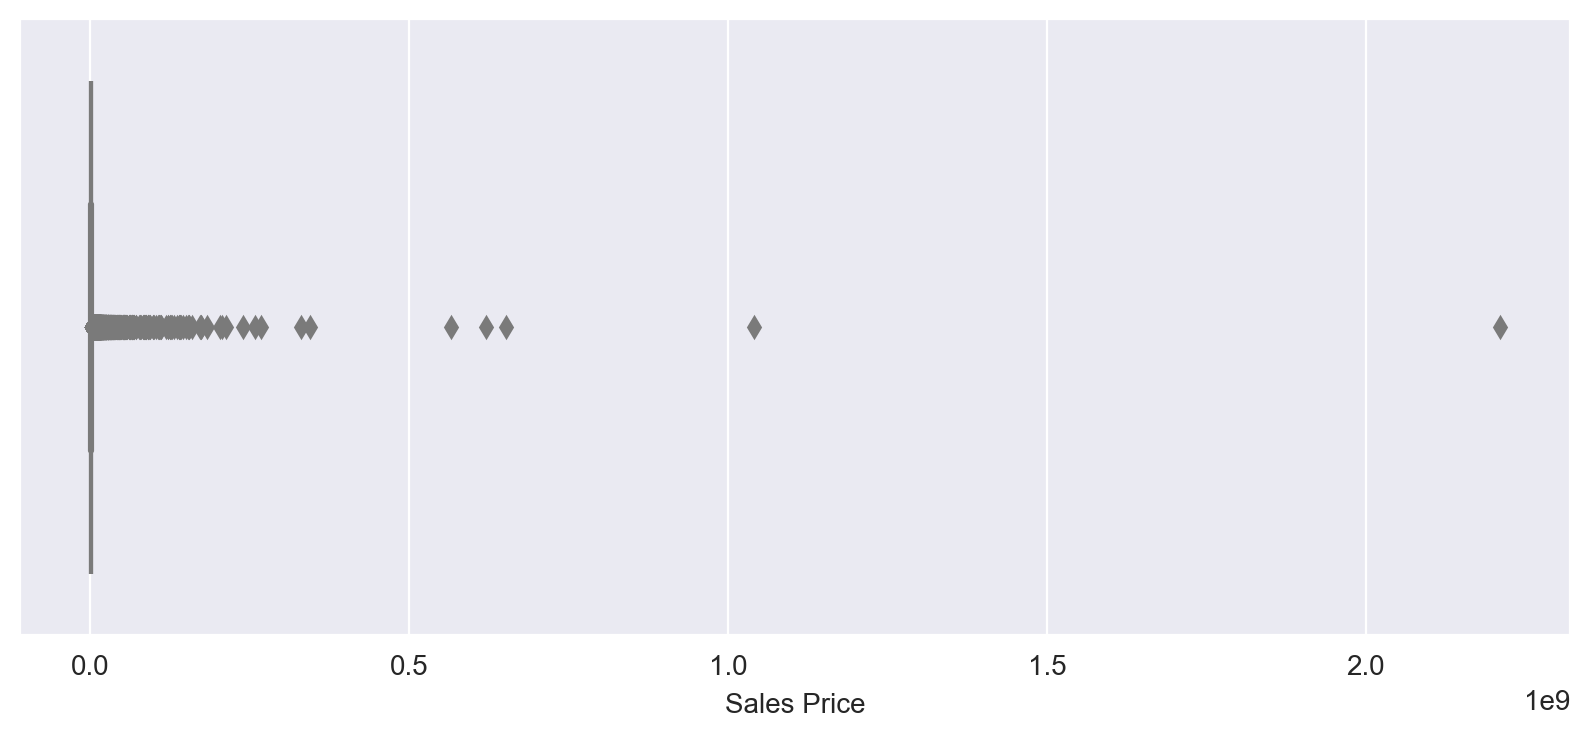

In [209]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.boxplot(data=df,x="sale_price",color=sns.color_palette("Pastel1")[1])
    plt.xlabel("Sales Price")
    plt.show()

Based on the box plot above, it can be seen that there are many outliers, so remove outliers using the Interquartile Range (IQR) method

In [210]:
sale_price_q1 = df["sale_price"].describe().loc["25%"]
sale_price_q3 = df["sale_price"].describe().loc["75%"]
sale_price_iqr = sale_price_q3 - sale_price_q1

sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

df_clean = df[(df["sale_price"] >= sale_price_lower_limit) & (df["sale_price"] <= sale_price_upper_limit)]
df_clean.head()

,borough,neighborhood,building_class_category,tax_class_at_present,building_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,year_built,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date
12,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,1.0,2016-09-06
13,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,499000.0,2017-03-10
14,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,10.0,2017-04-28
15,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,529500.0,2017-06-09
16,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,C6,10009,0,0,0,0.0,0.0,1920,2,C6,423000.0,2017-07-14


Recheck if the dataset still has any outliers. Apparently, there are still some outliers

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sale_price'>

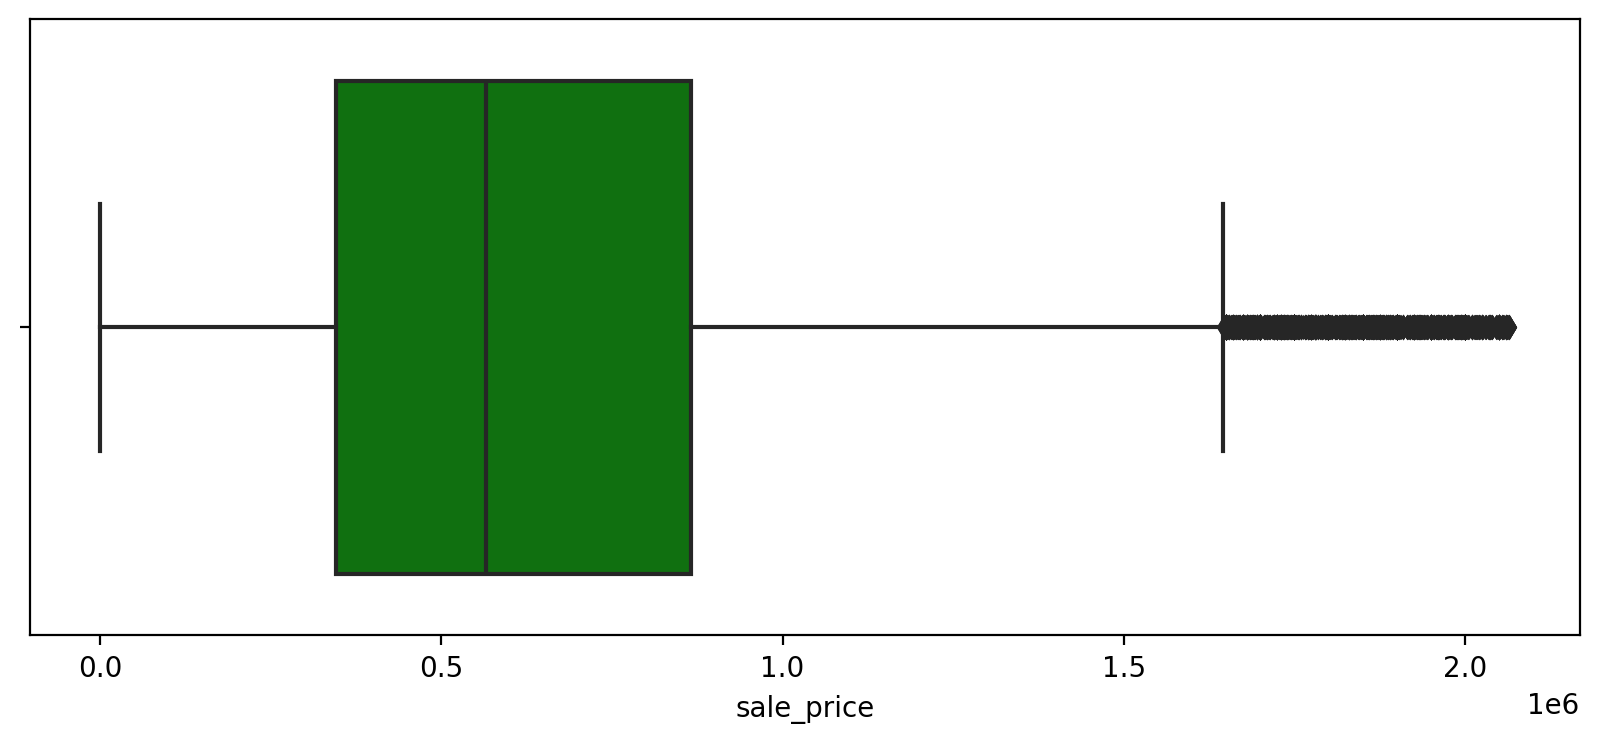

In [211]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_clean,x="sale_price", color="green")

Because there's still a lot of outliers, repeat the step above as much as needed

In [212]:
n = 1
limit = 2

while n <= limit:
    sale_price_q1 = df_clean["sale_price"].describe().loc["25%"]
    sale_price_q3 = df_clean["sale_price"].describe().loc["75%"]
    sale_price_iqr = sale_price_q3 - sale_price_q1

    sale_price_lower_limit = sale_price_q1 - (1.5 * sale_price_iqr)
    sale_price_upper_limit = sale_price_q3 + (1.5 * sale_price_iqr)

    df_clean = df_clean[(df_clean["sale_price"] >= sale_price_lower_limit) & (df_clean["sale_price"] <= sale_price_upper_limit)]
    
    n += 1

Even though there's still a few outliers, but it's much better than it was, so we can proceed to the next step

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='sale_price'>

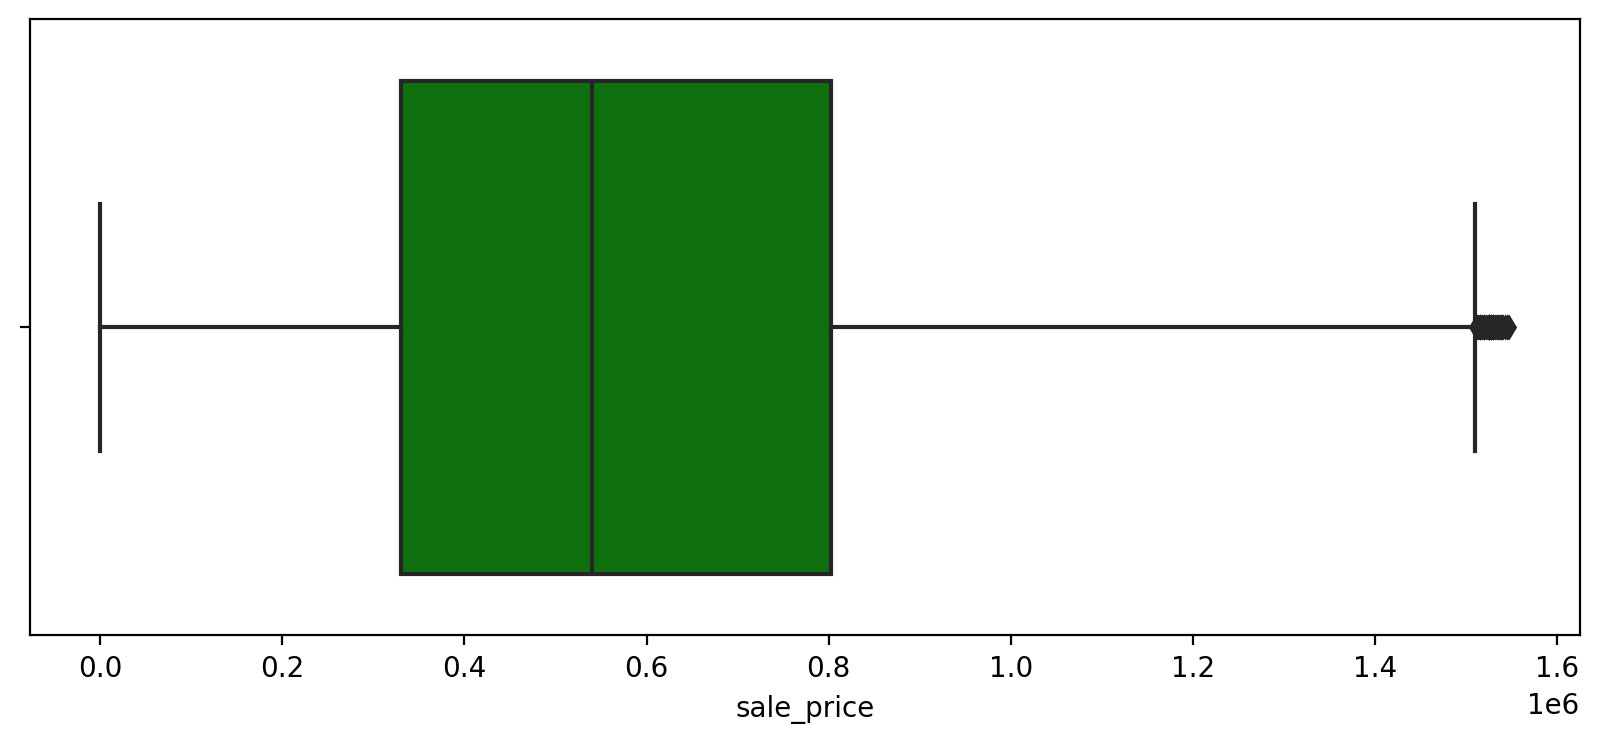

In [213]:
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(data=df_clean,x="sale_price", color="green")

# Measures of Central Tendency

Calculate measures of central tendency: 
```
- Mean 
- Median 
- Mode 
- Range 
- Variance 
- Standard Deviation
```

If there are NaN values, it means that there's only a single value within that borough and tax_class_at_present, so drop all of the NaN values 

In [214]:
from statistics import mode

measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean,
                                                                                  np.median,
                                                                                  mode,
                                                                                  np.ptp,
                                                                                  np.var,
                                                                                  np.std]}).reset_index()
measure.columns = measure.columns.droplevel(-1)
measure.columns = ["borough","tax_class_at_present","mean","median","mode","range","variance","standard_deviation"]
measure = measure.dropna()
measure

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_11600\1389131092.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean,
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_11600\1389131092.py:3: FutureWarning: The provided callable <function mean at 0x000001F55743AD40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  measure = df_clean.groupby(["borough","tax_class_at_present"]).agg({"sale_price":[np.mean,
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_11600\1389131092.py:3: FutureWarning: The provided callable <function median at 0x000001F5575777E0> is currently using SeriesGrou

,borough,tax_class_at_present,mean,median,mode,range,variance,standard_deviation
0,Manhattan,1,6.951295e+05,758212.5,10.0,1532990.0,3.233714e+11,568657.524282
3,Manhattan,1C,1.159167e+06,1102500.0,900000.0,575000.0,8.506458e+10,291658.333214
4,Manhattan,2,7.836155e+05,750000.0,1100000.0,1547499.0,1.216783e+11,348824.173646
5,Manhattan,2A,1.105614e+06,1300000.0,1320000.0,1524990.0,2.681566e+11,517838.423801
6,Manhattan,2B,6.838419e+05,645185.0,10.0,1505999.0,3.572927e+11,597739.698242
7,Manhattan,2C,7.673372e+05,730000.0,1500000.0,1529990.0,1.269797e+11,356342.055818
9,Manhattan,4,2.193664e+05,49900.0,33900.0,1499999.0,1.584041e+11,398000.115488
10,Bronx,1,4.500401e+05,450000.0,10.0,1449999.0,3.667393e+10,191504.398515
11,Bronx,1A,3.158523e+05,310000.0,230000.0,802281.0,2.226090e+10,149200.871084
12,Bronx,1B,3.361601e+05,290000.0,1000.0,1464999.0,1.180873e+11,343638.290800


Visualize the mean of sale_price from the tax_class_at_present in every borough

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


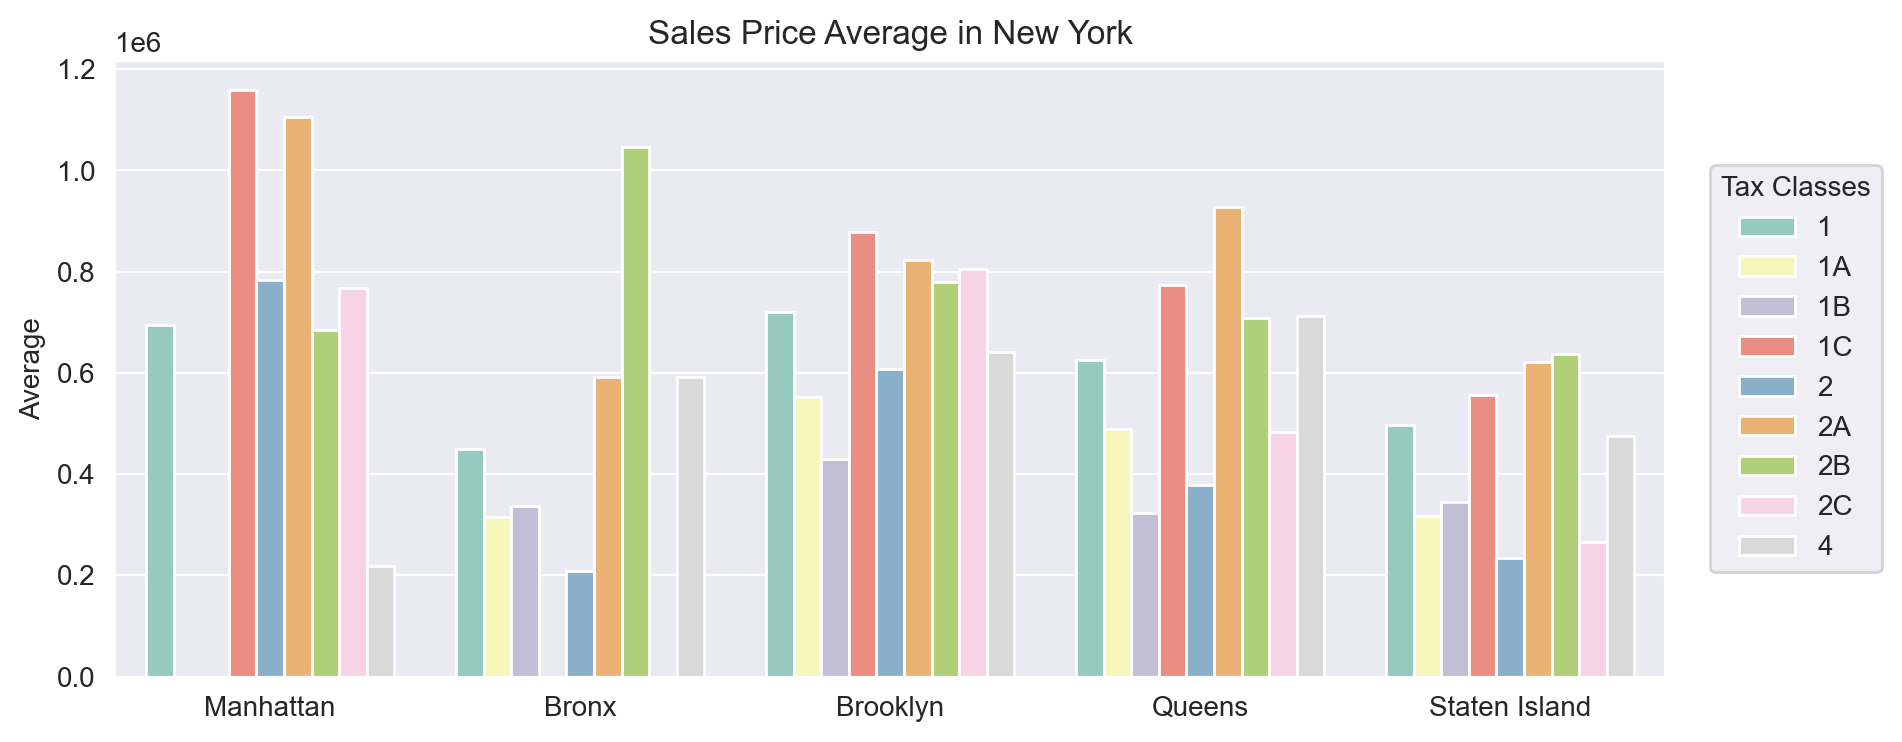

In [215]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,4),dpi=200)
    sns.barplot(data=measure,x="borough",y="mean",hue="tax_class_at_present",palette="Set3",
                hue_order=np.sort(measure["tax_class_at_present"].unique()))
    plt.title("Sales Price Average in New York")
    plt.xlabel("")
    plt.ylabel("Average")
    plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left",title="Tax Classes")
    plt.show()

# Confidence Intervals of Sample Mean

Based on the table above, the three regions that have the highest averages are Manhattan (1C), Manhattan (2A) and Bronx (2B). So, we will divide the data set based on these regions and tax_class_at_present

In [216]:
top_3_means = measure.sort_values("mean",ascending=False).head(3)

temp = []
for i,j in zip(top_3_means["borough"],top_3_means["tax_class_at_present"]):
    temp.append(df_clean[(df_clean["borough"] == i) & 
                         (df_clean["tax_class_at_present"] == j)])
    
top_3_sale_price = np.array(pd.concat(temp)["sale_price"])
top_3_sale_price

array([9.000000e+05, 1.102500e+06, 1.475000e+06, 1.000000e+01,
       3.130000e+05, 1.320000e+06, 1.800000e+05, 8.425000e+05,
       1.431326e+06, 1.100000e+06, 1.525000e+06, 1.300000e+06,
       1.300000e+06, 1.469500e+06, 1.275000e+06, 1.487500e+06,
       1.525000e+06, 1.400000e+06, 4.063000e+03, 1.320000e+06,
       1.500000e+06, 1.515000e+06, 1.130000e+06, 1.280000e+06,
       1.315000e+06, 8.800000e+05, 9.500000e+05, 1.100000e+06,
       1.175000e+06, 8.750000e+05, 1.200000e+06, 1.250000e+06,
       1.250000e+06, 1.100000e+06, 1.175000e+06, 1.525000e+06,
       1.100000e+06, 1.050000e+06, 4.300000e+04, 1.350000e+06,
       1.020000e+06, 1.400000e+06, 1.260000e+06, 7.500000e+05,
       8.400000e+05, 1.000000e+06, 5.000000e+05, 1.425000e+06,
       1.200000e+06, 1.450000e+06, 1.232030e+06, 1.150000e+06,
       1.350000e+06, 1.265000e+06, 1.264000e+06, 1.150000e+06,
       1.100000e+06, 7.650000e+05, 1.380000e+06, 1.000000e+06,
       8.500000e+05, 9.400000e+05, 9.100000e+05, 1.0000

Take 25 random samples and count for 500 times. Then add those values into a list called sample_mean

In [217]:
np.random.seed(9071)
sample_mean = []
n = 25

for i in range(500):
    temp_value = np.random.choice(a=top_3_sale_price,size=n)
    temp_mean = np.mean(temp_value)
    sample_mean.append(temp_mean)

Visualize it and we can conclude that our data is normally distributed visually

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_11600\2528910121.py:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for item in leg.legendHandles:


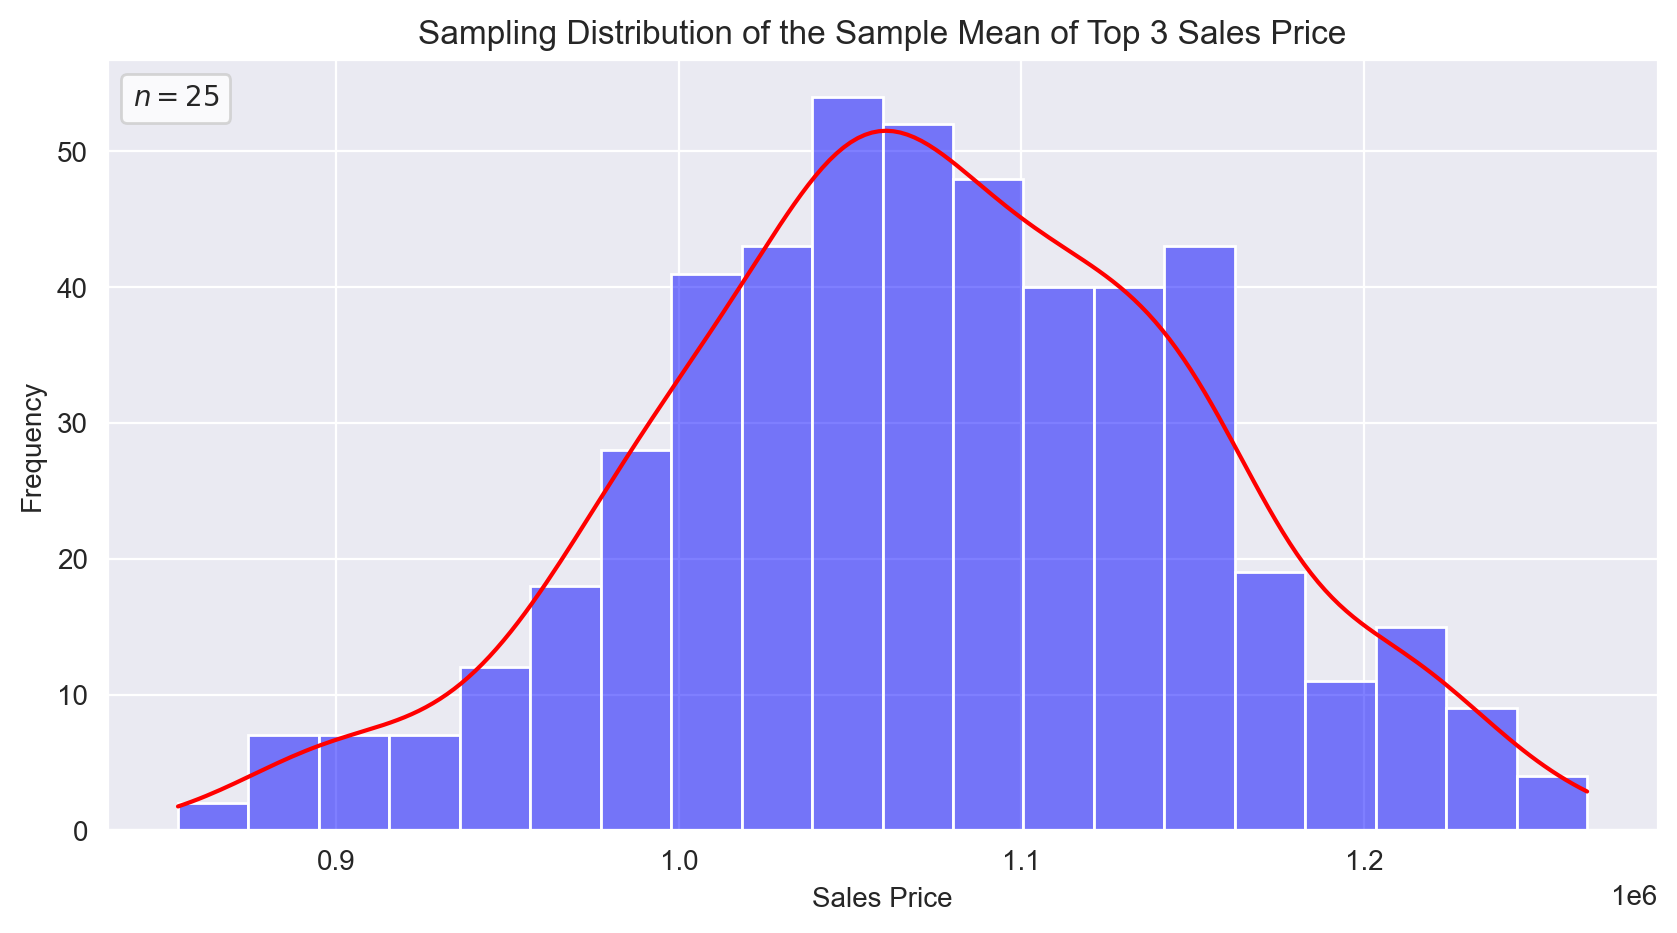

In [218]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sample_mean,bins=20,kde=True,color="blue",label=f"$n = {n}$")
    ax.lines[0].set_color("red")
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    for item in leg.legendHandles:
        item.set_visible(False)
    plt.show()

Calculate summary statistics to summarize and provide the gist of information about the sample_mean 

In [219]:
sample_mean_median = np.median(sample_mean)
sample_mean_mean = np.mean(sample_mean)
sample_mean_std = np.std(sample_mean)

for i,j in zip(["Median","Mean","Std."],[sample_mean_median,sample_mean_mean,sample_mean_std]):
    print(f"{i}\t= {j}")

Median	= 1069912.26
Mean	= 1072516.43344
Std.	= 78045.38128597314


Calculate the standard error where $$SE = σ/sqrt(n)$$ 

In [220]:
standard_error = np.std(top_3_sale_price)/np.sqrt(n)
standard_error

77585.59538292691

Calculate the value of z-score

In [221]:
from statistics import NormalDist

confidence = 0.95
z = NormalDist().inv_cdf((1 + confidence) / 2)
z

1.9599639845400536

Calculate the confidence interval where $CI = xbar ± zSE$

In [222]:
lower_95 = sample_mean_mean - (z * standard_error)
upper_95 = sample_mean_mean + (z * standard_error)

for i,j in zip(["Lower Limit","Upper Limit"],[lower_95,upper_95]):
    print(f"{i}\t= {j}")

Lower Limit	= 920451.4607703662
Upper Limit	= 1224581.4061096339


Visualize the confidence interval of the sample_mean. Based on the plot, it's determined that there's a 95% chance that the mean of a sample of N = 25 will be within the blue shaded area. Thus, the probability that the mean of a sample with N = 25 will be outside the blue shaded area is 100% - 95% or 5%.

C:\Users\Thinkpad Yoga\AppData\Local\Temp\ipykernel_11600\597728180.py:34: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  [item.set_visible(False) for item in leg.legendHandles]


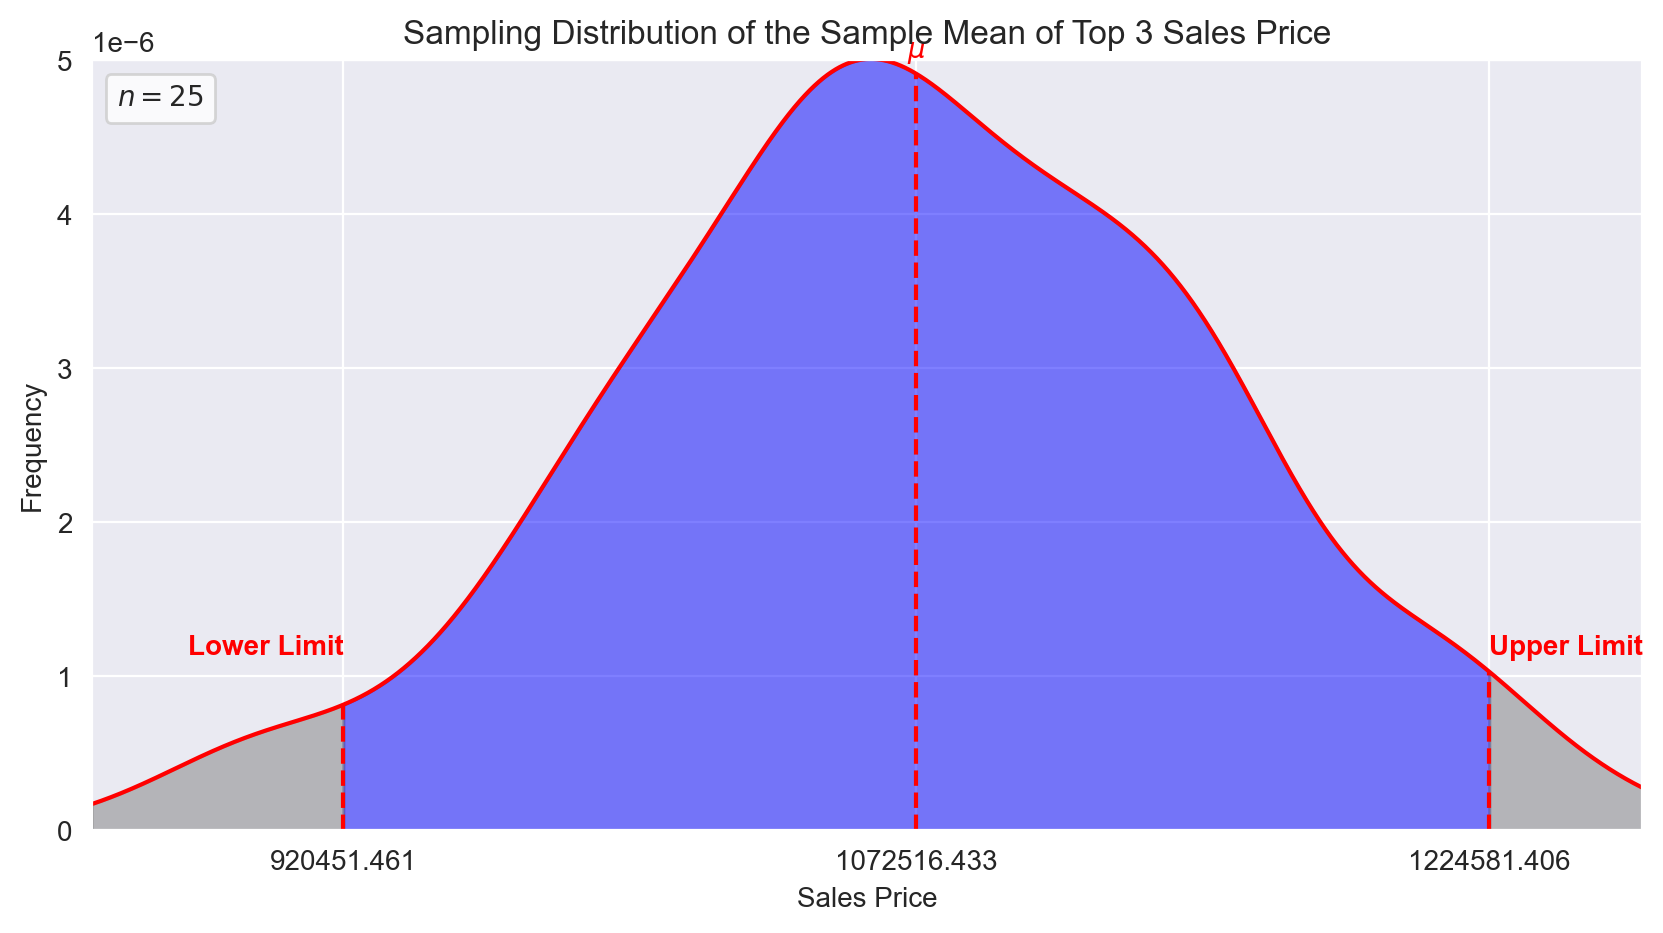

In [223]:
from scipy.stats import gaussian_kde

with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)

    kde = gaussian_kde(sample_mean)
    pos = np.linspace(np.min(sample_mean),np.max(sample_mean),10_000)
    plt.plot(pos,kde(pos),color="red",label=f"$n = {n}$")

    shade_95 = np.linspace(lower_95,upper_95,10_000)
    plt.fill_between(shade_95,kde(shade_95),color="blue",alpha=0.5)

    left = np.linspace(np.min(sample_mean),lower_95,10_000)
    right = np.linspace(upper_95,np.max(sample_mean),10_000)
    [plt.fill_between(i,kde(i),color="grey",alpha=0.5) for i in [left,right]]
    
    [plt.vlines(x=i,ymin=0,ymax=kde(i),color="red",linestyle="--") for i in [lower_95,sample_mean_mean,upper_95]]
        
    plt.annotate("Lower Limit",(lower_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="right")
    plt.annotate("$\mu$",(sample_mean_mean,kde(sample_mean_mean)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="center")
    plt.annotate("Upper Limit",(upper_95,kde(upper_95)),color="red",weight="bold",
                 textcoords="offset points",xytext=(0,6),ha="left")
    plt.title("Sampling Distribution of the Sample Mean of Top 3 Sales Price")
    plt.xlabel("Sales Price")
    plt.xticks([lower_95,sample_mean_mean,upper_95],
               [np.round(lower_95,3),np.round(sample_mean_mean,3),np.round(upper_95,3)])
    plt.xlim(np.min(sample_mean),np.max(sample_mean))
    plt.ylabel("Frequency")
    plt.ylim(0,5e-6)
    
    leg = plt.legend(handlelength=0,handletextpad=0,fancybox=True,loc="upper left",facecolor="white")
    [item.set_visible(False) for item in leg.legendHandles]
    
    plt.show()


# Probability Distribution & Hypothesis Testing

### Hypothesis
```
- H0 : top_3_sale_price data is normally distributed 
- H1 : top_3_sale_price data is not normally distributed 
```

### Significance Level 
α=5%


### Test Statistics 

Check normality visually

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


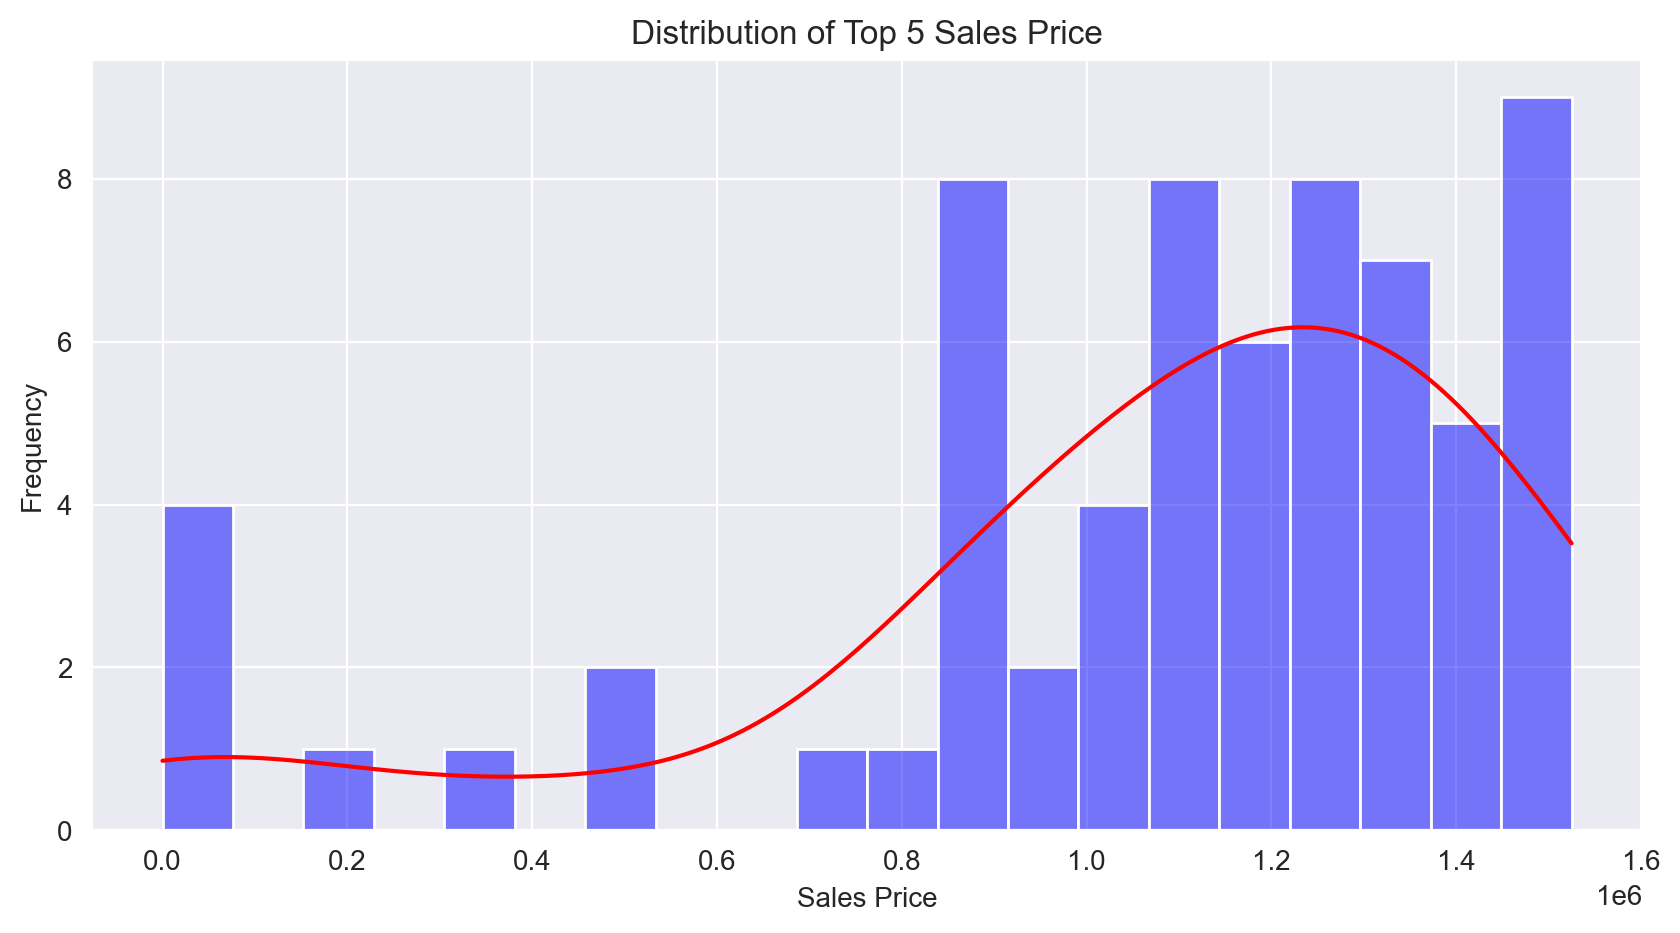

In [224]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=top_3_sale_price,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 5 Sales Price")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

Based on the histogram above, it can be seen that this distribution has moderate negative skewness. So its most likely not a normal distribution. But we try to formally check the normality test using Kolmogorov Smirnov and Shapiro Wilk

In [226]:
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import shapiro

ks_stat,ks_pval = lilliefors(top_3_sale_price,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(top_3_sale_price)

normality = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality

,Statistics,P-Values
Kolmogorov-Smirnov,0.157134,0.000295
Shapiro-Wilk,0.855060,0.000002


Based on the p-values Kolmogorov-Smirnov dan Shapiro Wilk, the results were less than 0.05. Then the data can be said to be abnormal, so we try to carry out a transformation 

In [227]:
sale_price_trans = np.sqrt(np.max(top_3_sale_price)-top_3_sale_price)
sale_price_trans 

array([ 790.56941504,  650.        ,  223.60679775, 1234.90485463,
       1100.90871556,  452.76925691, 1159.74135047,  826.13558209,
        306.0620852 ,  651.92024052,    0.        ,  474.34164903,
        474.34164903,  235.58437979,  500.        ,  193.64916731,
          0.        ,  353.55339059, 1233.26274573,  452.76925691,
        158.11388301,  100.        ,  628.4902545 ,  494.97474683,
        458.2575695 ,  803.11892021,  758.28754441,  651.92024052,
        591.60797831,  806.22577483,  570.08771255,  524.40442409,
        524.40442409,  651.92024052,  591.60797831,    0.        ,
        651.92024052,  689.2024376 , 1217.37422348,  418.33001327,
        710.63352018,  353.55339059,  514.78150705,  880.34084308,
        827.64726786,  724.56883731, 1012.42283657,  316.22776602,
        570.08771255,  273.86127875,  541.26703206,  612.3724357 ,
        418.33001327,  509.90195136,  510.88159098,  612.3724357 ,
        651.92024052,  871.77978871,  380.78865529,  724.56883

After transformation, the distribution is approximately symetric, so its seems it's normally distributed 

c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Thinkpad Yoga\.conda\envs\hacktiv8\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


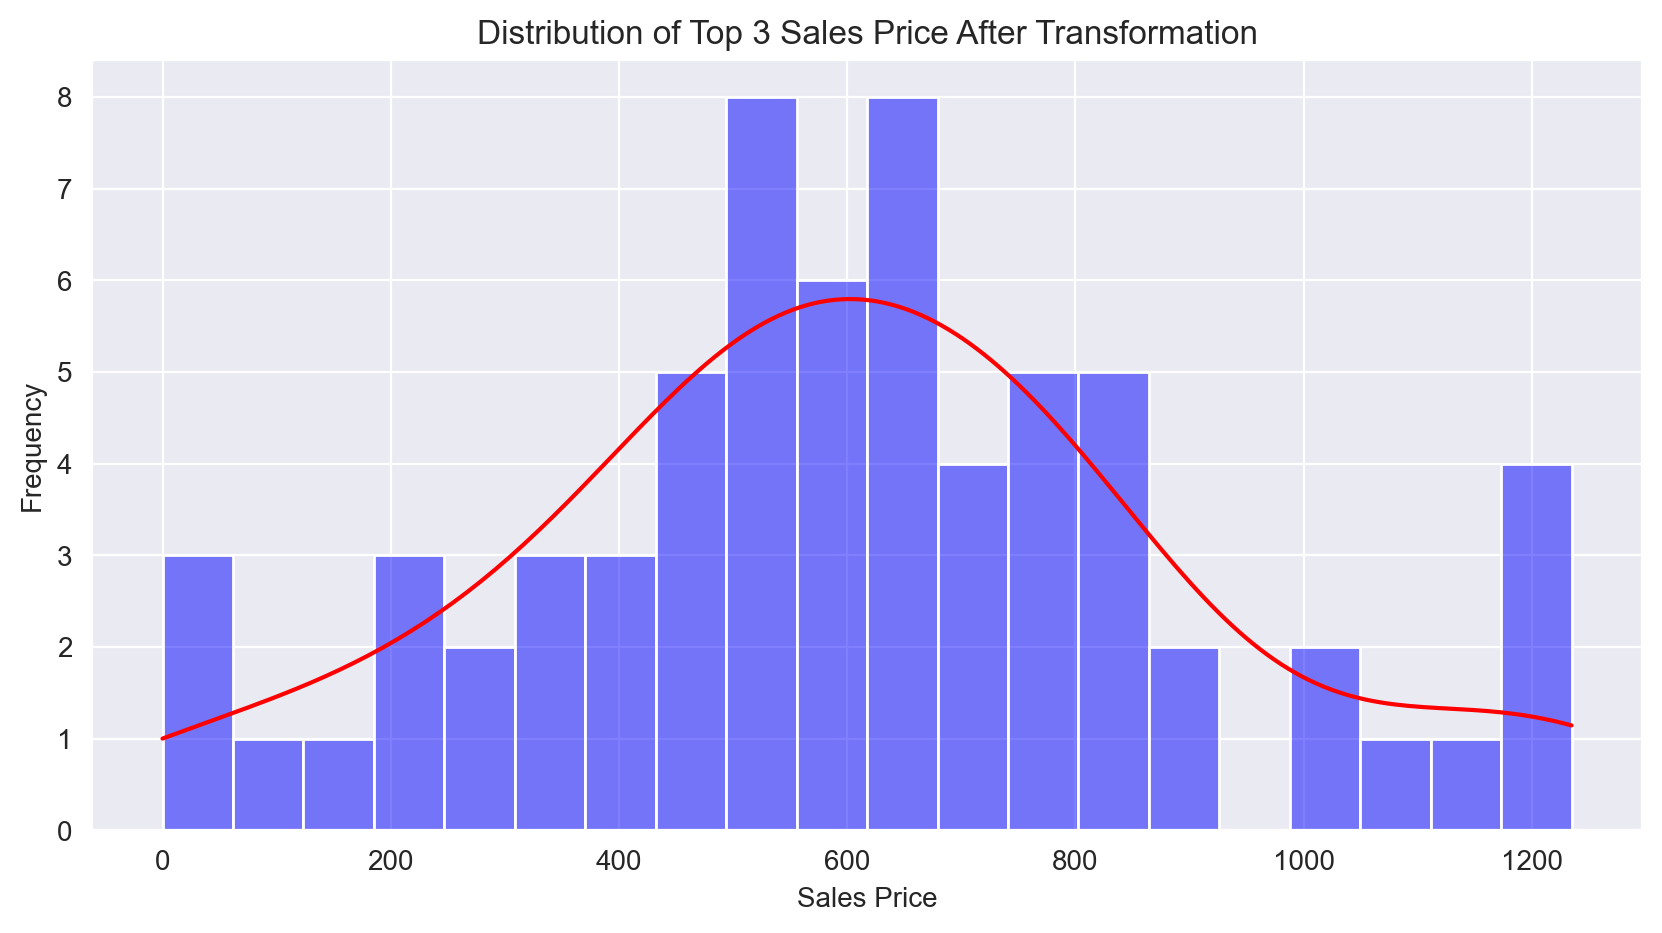

In [230]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(10,5),dpi=200)
    ax = sns.histplot(data=sale_price_trans,bins=20,kde=True,color="blue")
    ax.lines[0].set_color("red")
    plt.title("Distribution of Top 3 Sales Price After Transformation")
    plt.xlabel("Sales Price")
    plt.ylabel("Frequency")
    plt.show()

It's also known that both p-values of K-S and S-W, which are 0.452523 and 0,188328 respectively are greater than 0.05, so top_3_sale_price is now normally distributed 

In [229]:
ks_stat,ks_pval = lilliefors(sale_price_trans,dist="norm",pvalmethod="approx")
sw_stat,sw_pval = shapiro(sale_price_trans)

normality_trans = pd.DataFrame({"Statistics":[ks_stat,sw_stat],"P-Values":[ks_pval,sw_pval]},
                         index=["Kolmogorov-Smirnov","Shapiro-Wilk"])
normality_trans

,Statistics,P-Values
Kolmogorov-Smirnov,0.078397,0.452523
Shapiro-Wilk,0.974697,0.188337


# Conclusion 

Based on the output above, it can be seen visually that the distribution is approximately symmetric, so it seems it's normally distributed. Then formally, the probability of Kolmogorov-Smirnov = 0.45 > 0.05 and the p-values of Shapiro-Wilk = 0.97 > 0.05. So that it can be concluded that the data are normally distributed. Therefore, the assumption of normality visually and formally fulfilled.  